# 색으로 값의 크기를 표현하는 히트맵
- 히트맵을 이용하여 색으로 값의 크기를 표현하여 비교할 수 있다.
___

In [31]:
import matplotlib.pyplot as plt
# 폰트 확인하기
import matplotlib.font_manager as fm
[f.name for f in fm.fontManager.ttflist if 'Malgun' in f.name]
# '맑은 고딕'이 설치되어 있는지 검색
# 한글폰트 지정
plt.rcParams['font.family'] = 'Malgun Gothic'

# 한글폰트 사용시 '-'기호가 깨지는 문제 해결
plt.rcParams['axes.unicode_minus'] = False

## 1. 히트맵
___
- plt.pcolor(2차원데이터)


In [5]:
import numpy as np
import pandas as pd
# sample data
arr = np.random.standard_normal((5,5)) # 5*5 사이즈의 랜덤 값 배열 생성
df = pd.DataFrame(arr)
df

,0,1,2,3,4
0,-0.362937,1.677231,0.649751,0.708852,-0.861305
1,-1.457846,-0.752622,-0.528445,1.141264,0.286047
2,-0.282603,0.109550,-0.655547,-2.147910,-1.046667
3,-0.549653,0.944404,-1.903904,0.468354,-0.202262
4,0.240469,-0.257100,0.220988,-0.560946,-0.266891


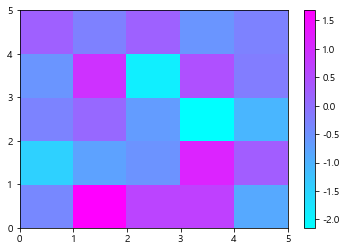

In [8]:
# draw hitmap
plt.pcolor(df, cmap='cool')
plt.colorbar() # cmap으로 컬러맵을 정의할 수 있다. 컬러맵은 구글에 치면 나온다.

## 2. 히트맵 예제
- 타이타닉호의 연령대_객실등급별 승선자수
___
### 2.1. 데이터 준비

In [1]:
import seaborn as sns
titanic = sns.load_dataset('titanic')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


### 2.2. 데이터 전처리

#### 2.2.1. 결측치 처리

In [2]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [3]:
# Null이 많은 deck 컬럼 삭제
titanic = titanic.drop(columns=['deck'])

In [22]:
# 결측치 삭제, NULL(NaN)이 포함된 행을 모두 삭제한다.
titanic = titanic.dropna()

In [23]:
titanic.shape

(712, 15)

#### 2.2.2. 연령대 컬럼 생성

In [60]:
(titanic['age']/10).astype('int')

0      2
1      3
2      2
3      3
4      3
      ..
885    3
886    2
887    1
889    2
890    3
Name: age, Length: 712, dtype: int32

In [24]:
titanic['agerange'] = (titanic['age'] / 10).astype('int') * 10


c:\Users\user\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [25]:
titanic['agerange']

0      20
1      30
2      20
3      30
4      30
       ..
885    30
886    20
887    10
889    20
890    30
Name: agerange, Length: 712, dtype: int32

In [55]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,agerange
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False,20
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,30
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,20
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False,30
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,Queenstown,no,False,30
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True,20
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True,10
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True,20


#### 2.2.3. 피벗테이블 : 연령대 * 객실등급 별 승선자수

In [65]:
titanic_pivot = titanic.pivot_table(index='class', columns='agerange', values='survived', aggfunc='count', fill_value=0)
titanic_pivot
# NaN을 0으로 처리하기 위해 fill_value 옵션을 이용하였다.

agerange,0,10,20,30,40,50,60,70,80
class,,,,,,,,,
First,3,18,34,49,37,27,12,3,1
Second,17,18,53,48,18,15,3,1,0
Third,42,66,133,69,34,6,3,2,0


### 2.3. 히트맵

#### 2.3.1. matplotlib

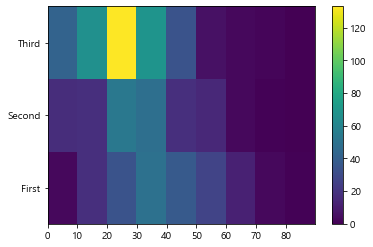

In [66]:
import numpy as np
plt.pcolor(titanic_pivot)
plt.colorbar()

plt.xticks(np.arange(0, len(titanic_pivot.columns), 1), labels=titanic_pivot.columns)
plt.yticks(np.arange(0.5, len(titanic_pivot.index), 1), labels=titanic_pivot.index)
plt.show()

#### 2.3.2. seaborn
___
- heatmap(data=2차원 데이터)
- cmap = colormap
- annot=True : 수치 표시
- fmt='d' : 정수로 표시

<AxesSubplot:xlabel='agerange', ylabel='class'>

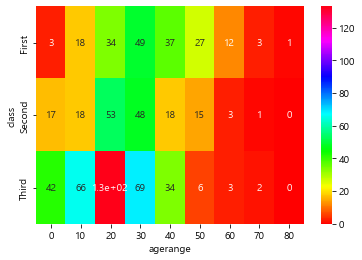

In [67]:
# sns.heatmap(titanic_pivot, cmap='hsv')
sns.heatmap(titanic_pivot, cmap='hsv', annot=True)
